In [1]:
#rcParams['savefig.dpi'] = 75

#from mpl_toolkits.basemap import Basemap
%matplotlib inline
from matplotlib.pylab import *
import numpy as np

from sigvisa import Sigvisa
from sigvisa.source.event import get_event
from sigvisa.signals.io import fetch_waveform, EventNotDetected, MissingWaveform
from sigvisa.models.ttime import tt_predict

from sigvisa.graph.sigvisa_graph import SigvisaGraph
from sigvisa.infer.optimize.optim_utils import construct_optim_params
from sigvisa.plotting.plot import plot_det_times, plot_pred_atimes
from sigvisa.database.dataset import read_evids_detected_at_station, read_event_detections, DET_TIME_COL

from sigvisa.graph.load_sigvisa_graph import load_sg_from_db_fit
from sigvisa.models.wiggles.wavelets import construct_full_basis_implicit

setting template 1 Lg to {'coda_decay': -4.133847, 'peak_offset': -3.393626, 'coda_height': 2.083468, 'arrival_time': 1189239761.484031, 'peak_decay': -1.775079}
setting template 1 Pn to {'coda_decay': -3.14889, 'peak_offset': 2.013127, 'coda_height': 5.737405, 'arrival_time': 1189239554.922526, 'peak_decay': -4.158408}
setting template 1 Sn to {'coda_decay': -2.211113, 'peak_offset': 1.87886, 'coda_height': 4.02859, 'arrival_time': 1189239679.303679, 'peak_decay': -1.833639}
setting template 1 Pg to {'coda_decay': -5.920881, 'peak_offset': -2.209539, 'coda_height': 4.251769, 'arrival_time': 1189239601.733237, 'peak_decay': -5.086068}
reading station detections... 


/home/dmoore/python/sigvisa/models/signal_model.py:602: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return TransientCombinedSSM(components, TSSM_NOISE_PADDING)


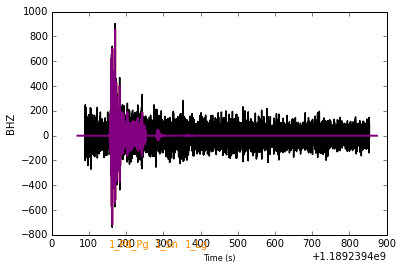

In [2]:
sg = load_sg_from_db_fit(250945)
sg.wiggle_family="db4_2.0_3_50.0"

wn = sg.station_waves["PD31"][0]
wn.wavelet_basis = construct_full_basis_implicit(srate=10.0,
                                              wavelet_str=sg.wiggle_family,
                                              c_format=True)

wn.arrival_ssms = {}

wn.tssm = wn.transient_ssm()
wn.plot(ax=gca())

(-649.40245481033401, 674.03906730066183)

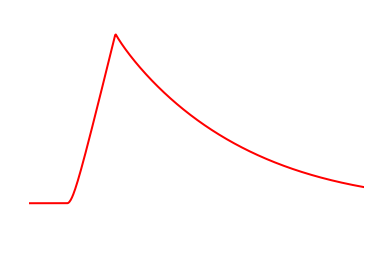

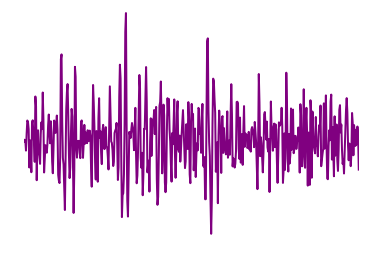

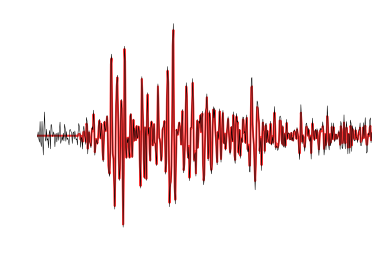

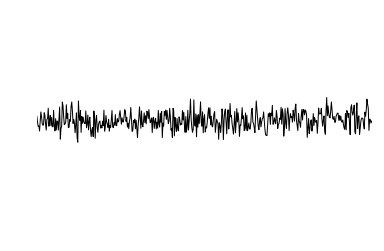

In [3]:

def plot_bare(data, x, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.axis('off')
    ax.plot(x, data, **kwargs)
    return ax

template = wn.tssm.obs_var(wn.npts)
template = np.sqrt(template)
x = np.linspace(wn.st, wn.et, wn.npts)

ax = plot_bare(template, x, color="red", linewidth=2)
ax.set_xlim([wn.st+80, wn.st+132])

d = wn.get_value()
lp1, marginals, step_ells = wn.tssm.all_filtered_cssm_coef_marginals(d)
posterior_means, posterior_vars = marginals[5]
cssm = wn.arrival_ssms[(1, "Pn")]
cssm.set_coef_prior(posterior_means, posterior_vars)
wiggle = cssm.mean_obs(500)
ax = plot_bare(wiggle, np.linspace(0, 20, 500), color="purple", linewidth=2)

pred_signal = wn.tssm.mean_obs(wn.npts)
ax = plot_bare(pred_signal, x, color="red", linewidth=2, alpha=0.8)
ax.plot(x, d, color="black", linewidth=0.5)
ax.set_xlim([wn.st+80, wn.st+132])


noise = wn.nm.sample(500)
ax = plot_bare(noise, np.linspace(0, 20, 500), color="black")
ax.set_ylim([5*np.min(noise), 5*np.max(noise)])

In [38]:
print wn.tssm_components[5][1]

Pn


In [24]:
print marginals

[(array([], dtype=float64), array([], dtype=float64)), (array([  1.06247266e-04,   7.15705526e-03,   1.50489420e-02,
        -2.47795839e-01,   8.01890156e-01,  -3.19885854e-01,
         1.12618005e-01,   6.03160833e-02,   8.97080335e-02,
        -1.50154841e-02,  -1.25617515e-01,   1.09213565e-01,
         6.95739133e-02,   2.74970765e-02,  -7.37484799e-02,
        -2.46050550e-02,   2.07359908e-01,  -8.66257827e-02,
        -9.55328398e-02,   2.19669765e-01,  -2.08389618e-03,
        -1.75142240e-01,   1.30330568e-01,   1.71575114e-01,
        -2.58017458e-01,   2.66933665e-01,  -9.68690644e-02,
         1.76082261e-02,  -2.08573672e-02,   1.53450439e-01,
        -7.34715967e-02,   5.23499059e-03,   5.90557180e-02,
        -2.48643530e-02,   2.56073021e-01,  -4.62952514e-01,
         5.80297264e-01,  -4.06214974e-01,   2.05081215e-01,
        -6.27904555e-03,   2.23748142e-02,   4.93048004e-02,
        -2.24949403e-02,   4.05255921e-03,   1.59057086e-01,
        -1.96093241e-01,   2.